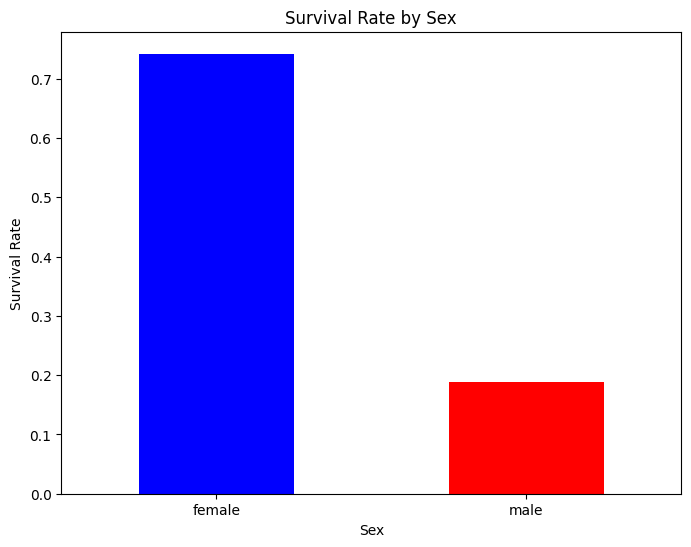

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('../pandas/Titanic-Dataset.csv')
sex_stats = df.groupby('Sex')['Survived'].mean()

plt.figure(figsize=(8, 6))
sex_stats.plot(kind='bar', color=['blue', 'red'])
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.xlabel('Sex')
plt.xticks(rotation=0)
plt.show()


Class value for money

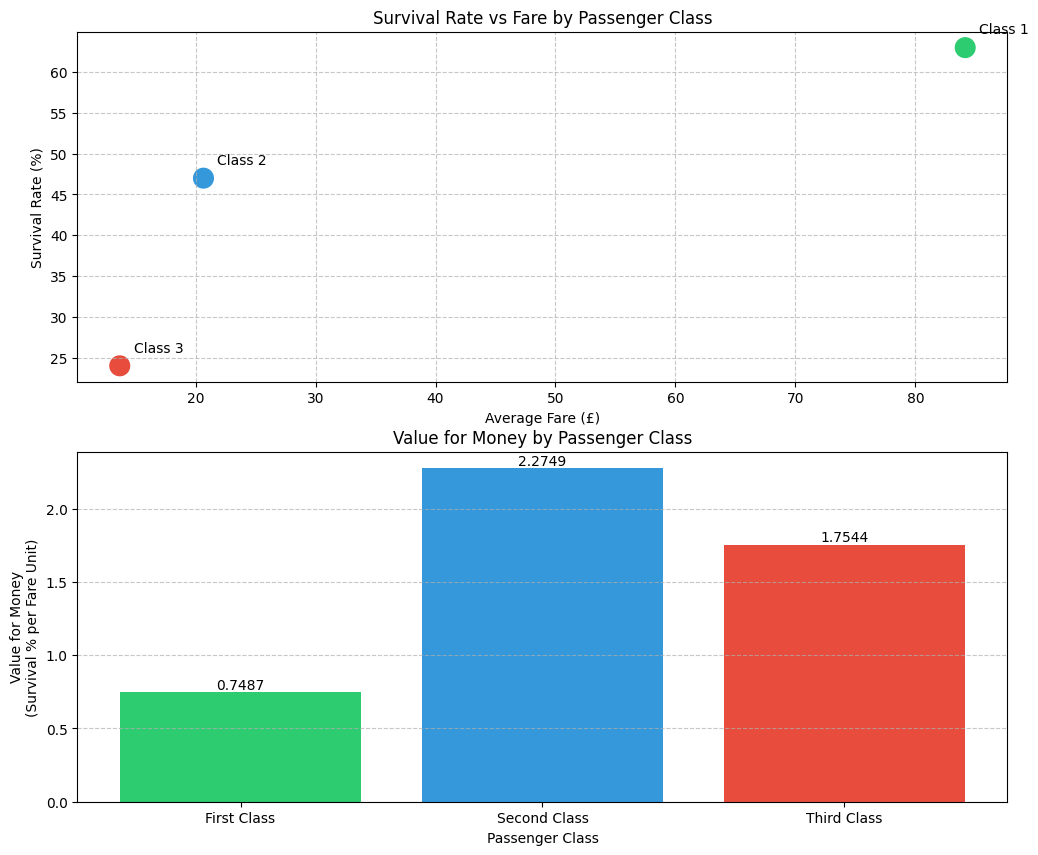


Value for Money Analysis:
--------------------------------------------------

Class 1:
Average Fare: £84.15
Survival Rate: 63.0%
Value Score: 0.7487
Number of Passengers: 216

Class 2:
Average Fare: £20.66
Survival Rate: 47.0%
Value Score: 2.2749
Number of Passengers: 184

Class 3:
Average Fare: £13.68
Survival Rate: 24.0%
Value Score: 1.7544
Number of Passengers: 491


In [14]:
class_stats = df.groupby('Pclass').agg({
    'Survived': 'mean',
    'Fare': 'mean'
}).round(2)

# Calculate "value for money" (survival rate per fare unit)
class_stats['Value'] = (class_stats['Survived'] / class_stats['Fare'] * 100).round(4)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), height_ratios=[1, 1])

# Colors for each class
colors = ['#2ecc71', '#3498db', '#e74c3c']

# Plot 1: Survival Rate vs Average Fare
ax1.scatter(class_stats['Fare'], class_stats['Survived'] * 100, 
           c=colors, s=200)

# Add class labels to points
for i, pclass in enumerate(class_stats.index):
    ax1.annotate(f'Class {pclass}', 
                 (class_stats['Fare'][pclass], class_stats['Survived'][pclass] * 100),
                 xytext=(10, 10), textcoords='offset points')

ax1.set_xlabel('Average Fare (£)')
ax1.set_ylabel('Survival Rate (%)')
ax1.set_title('Survival Rate vs Fare by Passenger Class')
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot 2: Value for Money (Survival Rate per Fare Unit)
bars = ax2.bar(class_stats.index, class_stats['Value'], color=colors)
ax2.set_xlabel('Passenger Class')
ax2.set_ylabel('Value for Money\n(Survival % per Fare Unit)')
ax2.set_title('Value for Money by Passenger Class')
ax2.set_xticks(class_stats.index)
ax2.set_xticklabels(['First Class', 'Second Class', 'Third Class'])
ax2.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom')

# Add summary statistics table
stats_text = "Class Statistics:\n\n"
for pclass in class_stats.index:
    stats_text += f"Class {pclass}:\n"
    stats_text += f"  Survival Rate: {class_stats['Survived'][pclass]*100:.1f}%\n"
    stats_text += f"  Average Fare: £{class_stats['Fare'][pclass]:.2f}\n"
    stats_text += f"  Value Score: {class_stats['Value'][pclass]:.4f}\n\n"


plt.show()

# Print detailed analysis
print("\nValue for Money Analysis:")
print("-" * 50)
for pclass in class_stats.index:
    print(f"\nClass {pclass}:")
    print(f"Average Fare: £{class_stats['Fare'][pclass]:.2f}")
    print(f"Survival Rate: {class_stats['Survived'][pclass]*100:.1f}%")
    print(f"Value Score: {class_stats['Value'][pclass]:.4f}")
    passenger_count = len(df[df['Pclass'] == pclass])
    print(f"Number of Passengers: {passenger_count}")

Fairs for age

/tmp/ipykernel_135691/1210260582.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  fare_by_age_class = df.pivot_table(values='Fare',


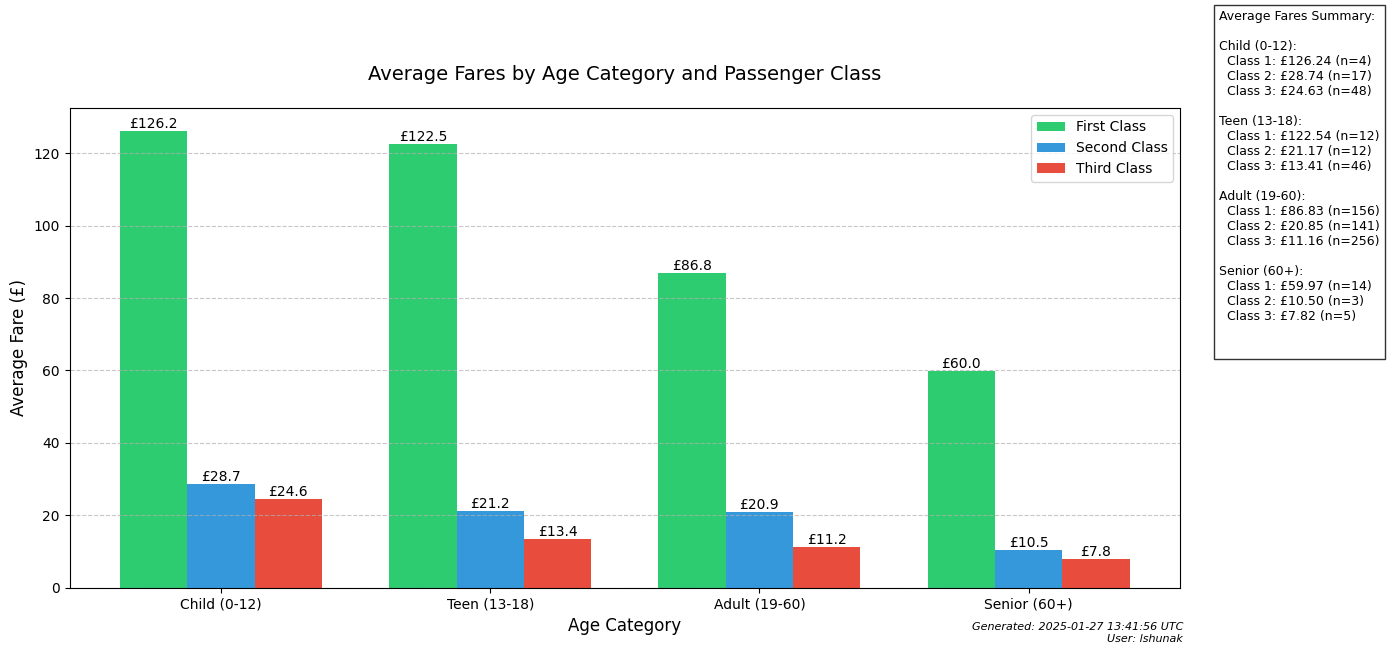


Detailed Statistics:
--------------------------------------------------

Child (0-12):
Class 1:
  Average Fare: £126.24
  Standard Deviation: £33.12
  Number of Passengers: 4
  Fare Range: £81.86 - £151.55
------------------------------
Class 2:
  Average Fare: £28.74
  Standard Deviation: £7.89
  Number of Passengers: 17
  Fare Range: £14.50 - £41.58
------------------------------
Class 3:
  Average Fare: £24.63
  Standard Deviation: £10.21
  Number of Passengers: 48
  Fare Range: £8.52 - £46.90
------------------------------

Teen (13-18):
Class 1:
  Average Fare: £122.54
  Standard Deviation: £72.29
  Number of Passengers: 12
  Fare Range: £39.40 - £262.38
------------------------------
Class 2:
  Average Fare: £21.17
  Standard Deviation: £17.79
  Number of Passengers: 12
  Fare Range: £10.50 - £73.50
------------------------------
Class 3:
  Average Fare: £13.41
  Standard Deviation: £10.72
  Number of Passengers: 46
  Fare Range: £6.50 - £46.90
------------------------------

Ad

In [15]:

# Create age categories
df['Age_Category'] = pd.cut(df['Age'], 
                           bins=[0, 12, 18, 60, np.inf],
                           labels=['Child (0-12)', 'Teen (13-18)', 'Adult (19-60)', 'Senior (60+)'])

# Calculate average fares by age category and class
fare_by_age_class = df.pivot_table(values='Fare', 
                                  index='Age_Category',
                                  columns='Pclass',
                                  aggfunc='mean').round(2)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Create grouped bar chart
bar_width = 0.25
r1 = np.arange(len(fare_by_age_class.index))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create bars
bars1 = ax.bar(r1, fare_by_age_class[1], bar_width, label='First Class', color='#2ecc71')
bars2 = ax.bar(r2, fare_by_age_class[2], bar_width, label='Second Class', color='#3498db')
bars3 = ax.bar(r3, fare_by_age_class[3], bar_width, label='Third Class', color='#e74c3c')

# Customize the plot
ax.set_ylabel('Average Fare (£)', fontsize=12)
ax.set_xlabel('Age Category', fontsize=12)
ax.set_title('Average Fares by Age Category and Passenger Class', pad=20, fontsize=14)
ax.set_xticks([r + bar_width for r in range(len(fare_by_age_class.index))])
ax.set_xticklabels(fare_by_age_class.index)

# Add value labels on the bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'£{height:.1f}',
                ha='center', va='bottom')

add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)

# Add grid
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add legend
ax.legend()

# Add statistical summary
stats_text = "Average Fares Summary:\n\n"
for age_cat in fare_by_age_class.index:
    stats_text += f"{age_cat}:\n"
    for pclass in fare_by_age_class.columns:
        fare = fare_by_age_class.loc[age_cat, pclass]
        count = len(df[(df['Age_Category'] == age_cat) & (df['Pclass'] == pclass)])
        stats_text += f"  Class {pclass}: £{fare:.2f} (n={count})\n"
    stats_text += "\n"

# Add text box with statistics
plt.figtext(1.02, 0.5, stats_text, fontsize=9,
            bbox=dict(facecolor='white', alpha=0.8))

# Add timestamp and user info
plt.figtext(0.99, 0.01, 
            f'Generated: 2025-01-27 13:41:56 UTC\nUser: lshunak',
            ha='right', 
            va='bottom', 
            fontsize=8, 
            style='italic')

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nDetailed Statistics:")
print("-" * 50)
for age_cat in fare_by_age_class.index:
    print(f"\n{age_cat}:")
    for pclass in fare_by_age_class.columns:
        fare = fare_by_age_class.loc[age_cat, pclass]
        passengers = df[(df['Age_Category'] == age_cat) & (df['Pclass'] == pclass)]
        count = len(passengers)
        if count > 0:
            std_dev = passengers['Fare'].std()
            print(f"Class {pclass}:")
            print(f"  Average Fare: £{fare:.2f}")
            print(f"  Standard Deviation: £{std_dev:.2f}")
            print(f"  Number of Passengers: {count}")
            print(f"  Fare Range: £{passengers['Fare'].min():.2f} - £{passengers['Fare'].max():.2f}")
        print("-" * 30)